In [877]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1038]:
house_df = pd.read_csv('Nashville_housing_data.csv')

In [1039]:
house_df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [1040]:
house_df.shape

(22651, 26)

In [1041]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [1042]:
house_df.isna().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [1043]:
house_df.columns

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference',
       'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'State',
       'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')

In [1044]:
house_df.drop(['Unnamed: 0','Property Address','Property City','Suite/ Condo   #','Parcel ID','Legal Reference','City','State',],axis=1,inplace=True)

In [1045]:
house_df = house_df.dropna(how='any')

In [1046]:
house_df.columns

Index(['Land Use', 'Sale Date', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Acreage', 'Tax District',
       'Neighborhood', 'Land Value', 'Building Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath', 'Sale Price Compared To Value'],
      dtype='object')

In [1047]:
house_df_clean.isnull().sum()

Land Use                             0
Property Address                     0
Property City                        0
Sale Date                            0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
Sale Price Compared To Value         0
dtype: int64

In [1048]:
house_df['Sale Date'] = pd.to_datetime(house_df['Sale Date'])

In [1049]:
house_df['Sale Year'] = house_df['Sale Date'].dt.year

In [1050]:
house_df['Sale Month'] = house_df['Sale Date'].dt.month

In [1051]:
from datetime import datetime

In [1052]:
import calendar
house_df['Sale Month'] = house_df['Sale Month'].apply(lambda x: calendar.month_abbr[x])

In [1053]:
house_df.select_dtypes(include=['int64','float64'])

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year
0,0.17,3127,32000,134400,1149.00000,1941,2.0,1.0,0.0,2013
1,0.11,9126,34000,157800,2090.82495,2000,3.0,2.0,1.0,2013
2,0.17,3130,25000,243700,2145.60001,1948,4.0,2.0,0.0,2013
3,0.34,3130,25000,138100,1969.00000,1910,2.0,1.0,0.0,2013
4,0.17,3130,25000,86100,1037.00000,1945,2.0,1.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...
22646,0.38,6328,25000,105000,1758.00000,1996,3.0,2.0,0.0,2016
22647,0.27,6328,25000,142400,2421.00000,1996,3.0,3.0,0.0,2016
22648,0.23,6328,25000,159300,3117.00000,1995,3.0,3.0,0.0,2016
22649,0.15,126,40000,204100,1637.00000,2004,3.0,2.0,1.0,2016


In [1054]:
# Data Visualization

<AxesSubplot:xlabel='Sale Price Compared To Value', ylabel='count'>

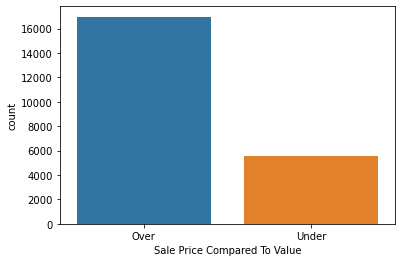

In [1055]:
sns.countplot(house_df['Sale Price Compared To Value'])

Text(0.5, 0, 'Year of Sales')

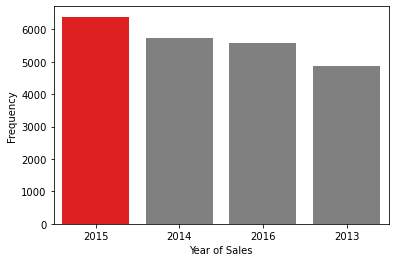

In [1056]:
cols = ['grey' if (x < max(house_df['Sale Year'].value_counts())) else 'red' for x in house_df['Sale Year'].value_counts()]
ax = sns.countplot(x=house_df['Sale Year'],palette=cols,order=house_df['Sale Year'].value_counts().index,data=house_df)
ax.set_ylabel('Frequency')
ax.set_xlabel('Year of Sales')

Text(0.5, 0, 'Months')

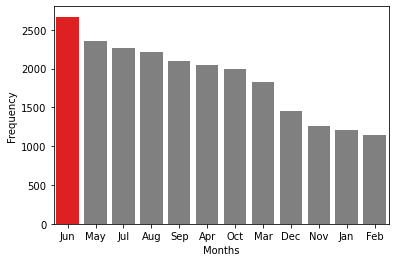

In [1057]:
cols = ['grey' if (x < max(house_df['Sale Month'].value_counts())) else 'red' for x in house_df['Sale Month'].value_counts()]
ax = sns.countplot(x=house_df['Sale Month'],palette=cols,order=house_df['Sale Month'].value_counts().index,data=house_df)
ax.set_ylabel('Frequency')
ax.set_xlabel('Months')

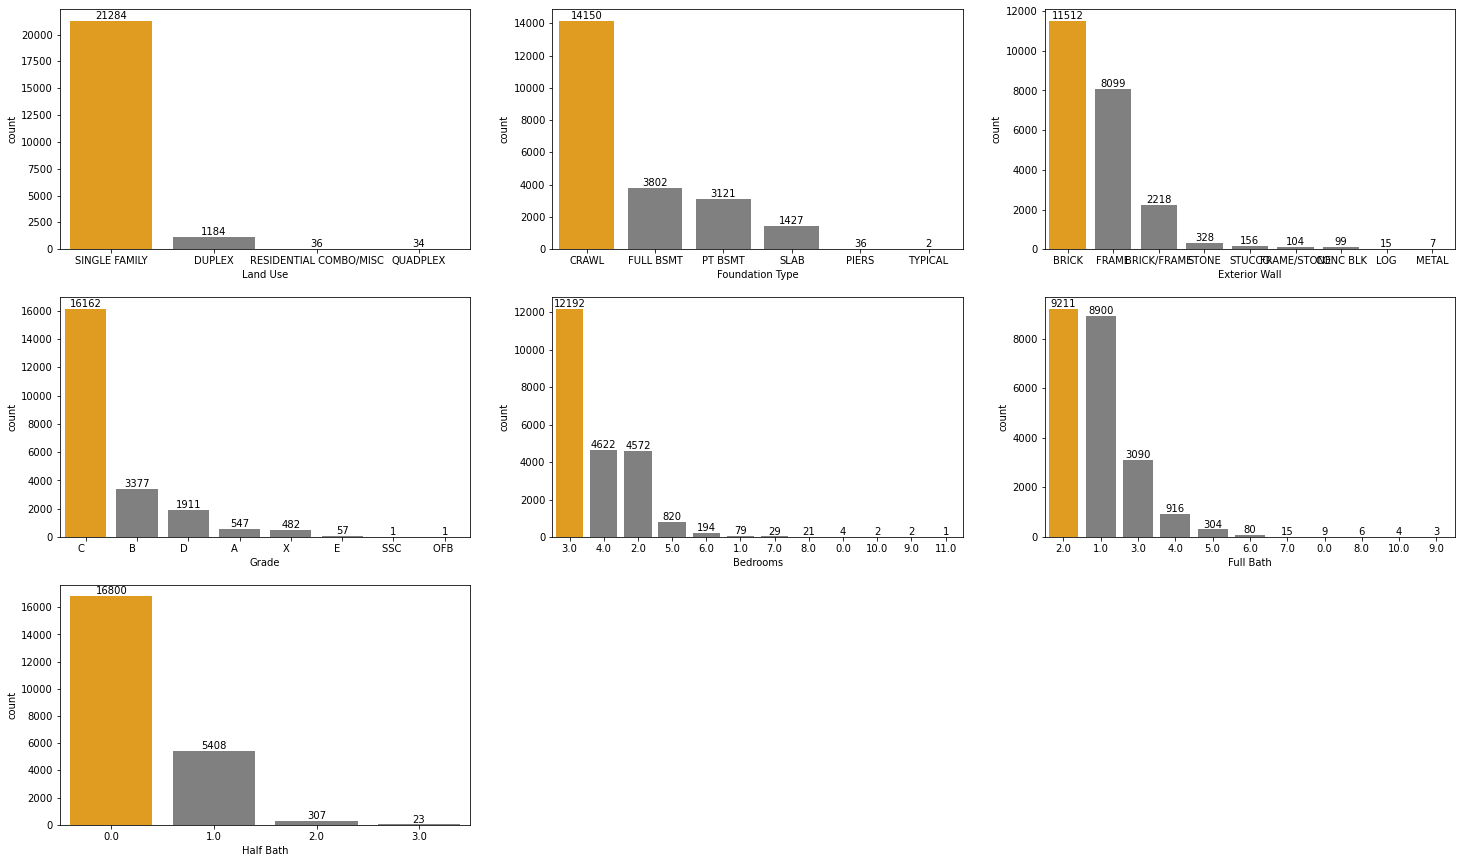

In [1058]:
figure_cat = plt.figure(figsize=(25,15))
for ind,col in enumerate(['Land Use','Foundation Type','Exterior Wall','Grade','Bedrooms','Full Bath','Half Bath']):
    cols = ['grey' if (x < max(house_df[col].value_counts())) else 'orange' for x in house_df[col].value_counts()]
    ax = figure_cat.add_subplot(3,3,ind+1)
    sns.countplot(x=col,palette=cols,order=house_df[col].value_counts().index,data=house_df)
#     plt.xticks(rotation = 10)
    for container in ax.containers:
        ax.bar_label(container)


In [1059]:
house_df['Property Value'] = house_df.loc[:, ['Building Value', 'Land Value']].sum(axis=1)

<AxesSubplot:xlabel='Acreage', ylabel='Building Value'>

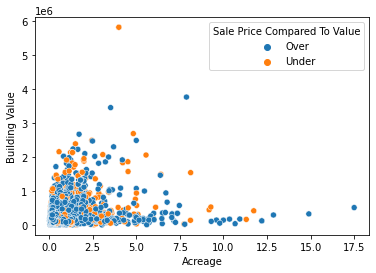

In [1060]:
sns.scatterplot(x='Acreage',y='Building Value',hue='Sale Price Compared To Value',data=house_df)

<AxesSubplot:xlabel='Acreage', ylabel='Land Value'>

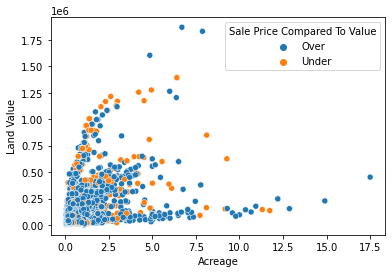

In [1061]:
sns.scatterplot(x='Acreage',y='Land Value',hue='Sale Price Compared To Value',data=house_df)

<AxesSubplot:xlabel='Finished Area', ylabel='Building Value'>

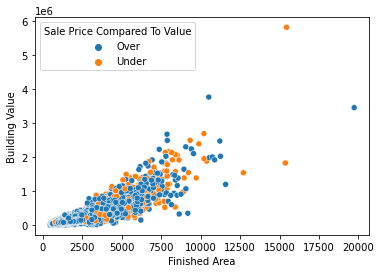

In [1062]:
sns.scatterplot(x='Finished Area',y='Building Value',hue='Sale Price Compared To Value',data=house_df)

<AxesSubplot:xlabel='Finished Area', ylabel='Property Value'>

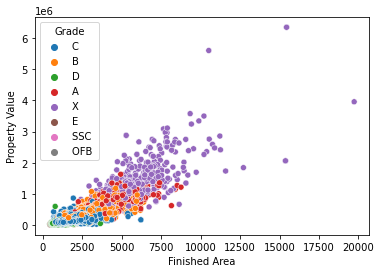

In [1063]:
sns.scatterplot(x='Finished Area',y='Property Value',hue='Grade',data=house_df)

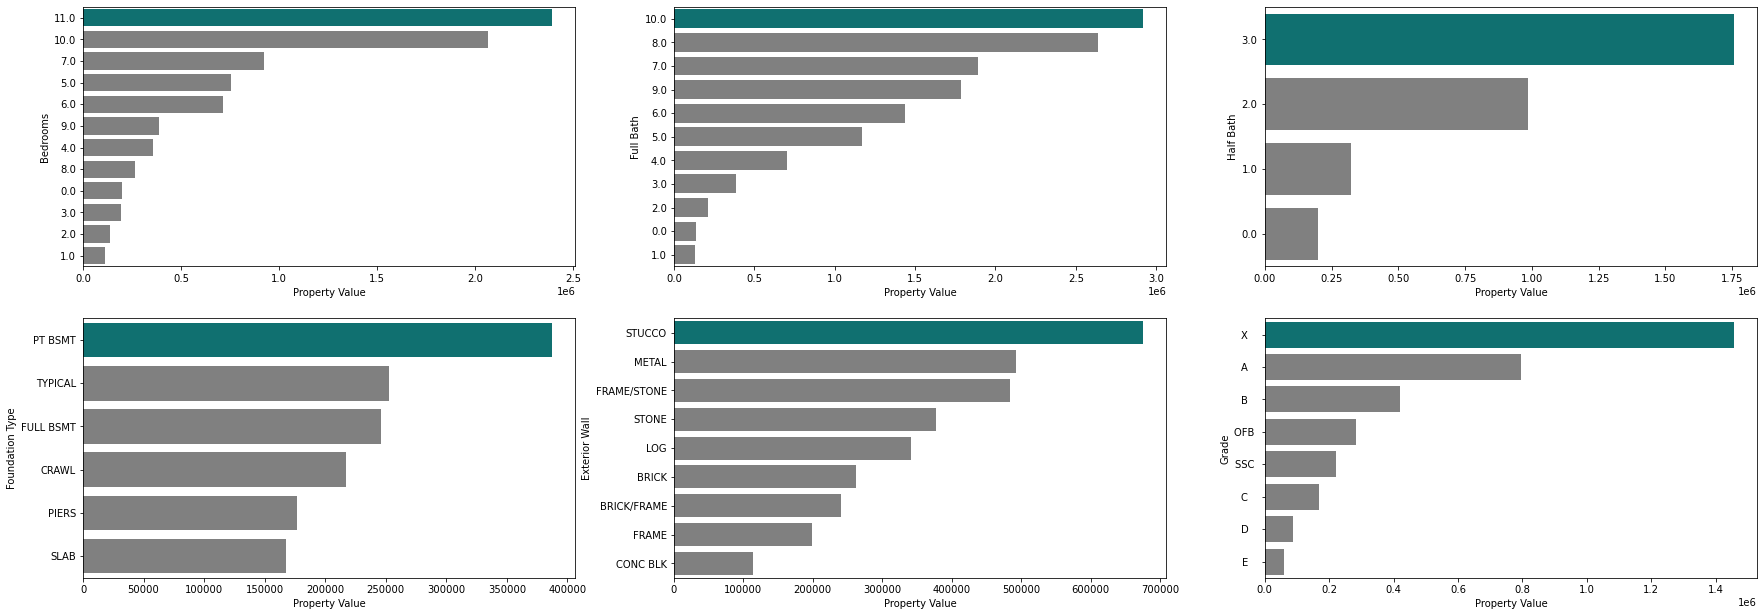

In [1064]:
       
figure_cat = plt.figure(figsize=(30,10.5))
for ind,col in enumerate(['Bedrooms','Full Bath','Half Bath','Foundation Type','Exterior Wall','Grade']):
    house_val = house_df.groupby(col)['Property Value'].mean().reset_index().sort_values('Property Value',ascending=False)
    cols = ['grey' if (x < max(house_df[col].value_counts())) else 'Teal' for x in house_df[col].value_counts()]
    ax = figure_cat.add_subplot(2,3,ind+1)
    sns.barplot(y=col,x=house_df['Property Value'],palette=cols,order=house_val[col],ci=False,data=house_df,orient='horizontal')


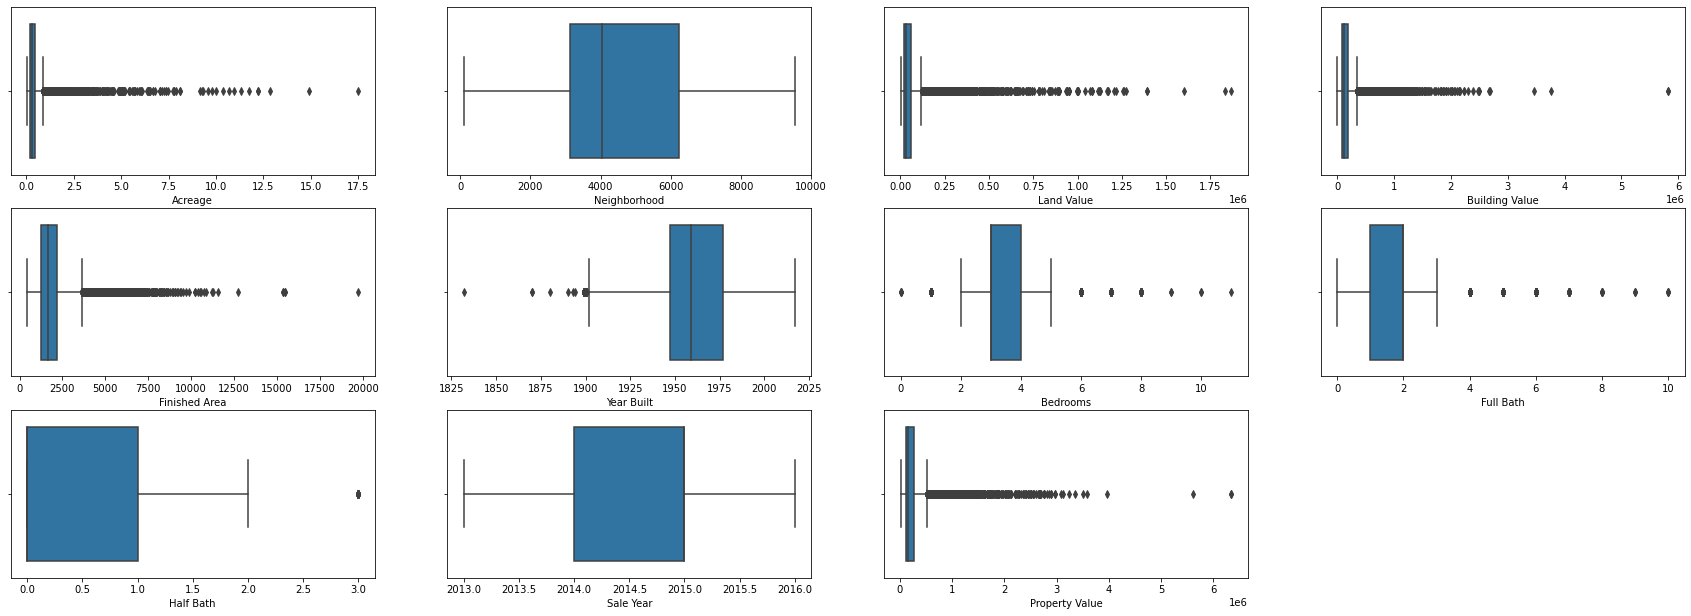

In [1065]:
figure_cat = plt.figure(figsize=(30,10.5))
for ind,col in enumerate(house_df.select_dtypes(include=['int64','float64'])):
    ax = figure_cat.add_subplot(3,4,ind+1)
    sns.boxplot(x=house_df[col])

<AxesSubplot:>

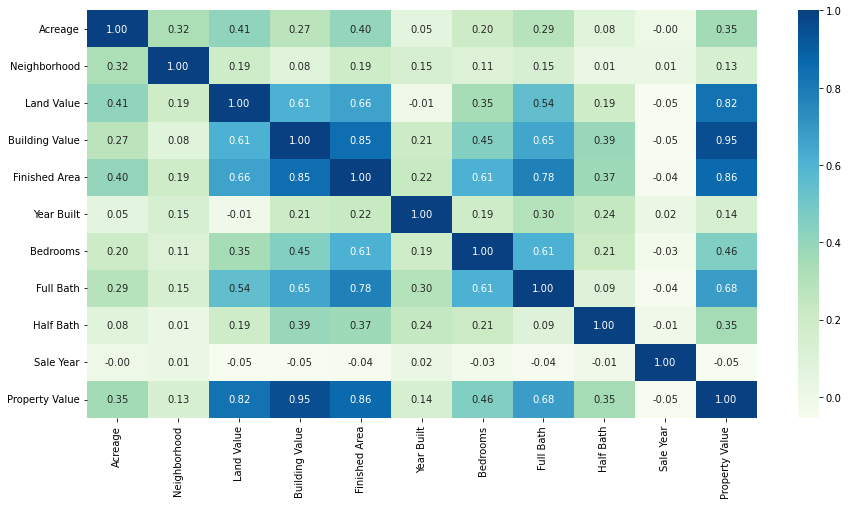

In [1066]:
plt.figure(figsize=(15,7.5))
sns.heatmap(house_df.corr(),annot=True, fmt=".2f",cmap="GnBu")

In [1067]:
from operator import add
def find_anomalies(data):
    anomalies = []
    
    for col in data:
        Q1 = np.percentile(data[col], 25,
                interpolation = 'midpoint')
 
        Q3 = np.percentile(data[col], 75,
                        interpolation = 'midpoint')
        IQR = Q3 - Q1
        
        print('Col:',col)
        
#         print('Q1:',Q1,'Q3:',Q3,'IQR:',IQR)

        upper = np.where(data[col] >= (Q3+1.5*IQR))

        lower = np.where(data[col] <= (Q1-1.5*IQR))

        print(lower[0])
        print(upper[0])
        
        try:
            if len(lower[0]) != 0 and len(lower[0]) > 0:
                for low_val in lower[0]:
                    anomalies.append(low_val)
            if len(upper[0]) != 0 and len(upper[0]) > 0:
                for up_val in upper[0]:
                    anomalies.append(up_val)
        except:
            pass
#     print(list(set(anomalies)))
    
    return list(set(anomalies))
    

In [1068]:
outl_list = find_anomalies(house_df.select_dtypes(include=['int64','float64']))

Col: Acreage
[]
[   41    42    47 ... 22500 22501 22502]
Col: Neighborhood
[]
[]
Col: Land Value
[]
[   23    24    28 ... 22194 22195 22501]
Col: Building Value
[]
[   28    31    33 ... 22187 22361 22426]
Col: Finished Area
[]
[   33    46    47 ... 22426 22446 22447]
Col: Year Built
[  127   185   339   591   721   958   966   969  1311  1446  1459  1592
  1735  1753  1765  2004  2005  2049  2318  2429  2580  2588  3099  3116
  3163  3253  3254  3306  3516  3517  3526  3606  3690  3741  3923  3924
  3928  3933  3935  4307  4319  4410  4421  4734  4762  4856  5036  5047
  5274  5354  5427  6075  6231  6240  6340  6341  6344  6691  6717  6830
  7224  7225  7226  7242  7613  7654  7805  8343  8412  8526  8929  9455
  9468  9484  9636  9744  9948  9955 10629 10653 10736 10859 11120 11140
 11554 11570 11585 11587 11603 11738 12114 12123 12316 12607 12772 13059
 13175 13228 13252 13502 13509 13698 13975 14025 14208 14210 14628 14808
 14810 14813 15133 15373 15381 15540 15711 15866 15868 

In [914]:
len(outl_list) == len(set(outl_list))

True

In [1071]:
for elm in outl_list:
    if elm in [234, 7046, 8118, 9738, 11188, 11325, 11328, 11329, 11333, 12471, 12772, 13191, 13199, 14034, 14607, 16422, 16808, 17834, 17859, 19280, 19305, 20029, 20056,17588, 18015, 18739, 18740, 18880, 19524, 21933]:
        print(elm)
        outl_list.remove(elm)        

In [1072]:
len(outl_list)

6406

In [1073]:
house_df.drop(outl_list,inplace=True)

In [1074]:
house_df.shape

(16132, 21)

In [1075]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16132 entries, 0 to 22650
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Land Use                           16132 non-null  object        
 1   Sale Date                          16132 non-null  datetime64[ns]
 2   Sold As Vacant                     16132 non-null  object        
 3   Multiple Parcels Involved in Sale  16132 non-null  object        
 4   Acreage                            16132 non-null  float64       
 5   Tax District                       16132 non-null  object        
 6   Neighborhood                       16132 non-null  int64         
 7   Land Value                         16132 non-null  int64         
 8   Building Value                     16132 non-null  int64         
 9   Finished Area                      16132 non-null  float64       
 10  Foundation Type                   

In [1093]:
house_df.drop(['Sale Month','Land Value','Building Value'],axis=1,inplace=True)

In [1094]:
# One Hot encoding

In [1095]:
for cols in house_df.select_dtypes(include='object'):
    if house_df[cols].nunique() > 5:
        print(cols)

Tax District
Foundation Type
Exterior Wall
Grade


In [1096]:
one_hot = pd.get_dummies(house_df[['Land Use']], drop_first = True)
new_house_df = pd.concat([house_df, one_hot], axis = 1)
new_house_df.drop(house_df[['Land Use']], axis = 1, inplace = True)

In [1097]:
from sklearn.preprocessing import LabelEncoder

In [1098]:
categorical = ['Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Sale Price Compared To Value', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade']
for feature in categorical:
        labelencoder = LabelEncoder()
        new_house_df[feature] = labelencoder.fit_transform(new_house_df[feature])

In [1099]:
new_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16132 entries, 0 to 22650
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Sale Date                          16132 non-null  datetime64[ns]
 1   Sold As Vacant                     16132 non-null  int32         
 2   Multiple Parcels Involved in Sale  16132 non-null  int32         
 3   Acreage                            16132 non-null  float64       
 4   Tax District                       16132 non-null  int32         
 5   Neighborhood                       16132 non-null  int64         
 6   Finished Area                      16132 non-null  float64       
 7   Foundation Type                    16132 non-null  int32         
 8   Year Built                         16132 non-null  int64         
 9   Exterior Wall                      16132 non-null  int32         
 10  Grade                             

In [1100]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [1101]:
# scaler.fit(new_house_df.drop(['Sale Price Compared To Value','Sale Date'],axis=1))
# scaled_features = scaler.transform(new_house_df.drop(['Sale Price Compared To Value','Sale Date'],axis=1))

In [1102]:
# new_house_df_scaled = pd.DataFrame(scaled_features,columns=new_house_df.columns[~new_house_df.columns.isin(['Sale Price Compared To Value','Sale Date'])])
# new_house_df_scaled.head()

In [1103]:
# X = new_house_df_scaled
X = new_house_df.drop(['Sale Price Compared To Value','Sale Date'],axis=1)
y = new_house_df['Sale Price Compared To Value']

In [1104]:
X.columns

Index(['Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Acreage',
       'Tax District', 'Neighborhood', 'Finished Area', 'Foundation Type',
       'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath',
       'Half Bath', 'Sale Year', 'Property Value', 'Land Use_QUADPLEX',
       'Land Use_RESIDENTIAL COMBO/MISC', 'Land Use_SINGLE FAMILY'],
      dtype='object')

In [1105]:
y.value_counts()

0    12096
1     4036
Name: Sale Price Compared To Value, dtype: int64

In [1106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [1107]:
# SOMTE- Oversampling Technique

In [1108]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [1109]:
res_smt = SMOTE(random_state=369)
X_train_res, y_train_res = res_smt.fit_resample(X_train, y_train)
print('Resampled %s' % Counter(y_train_res))

Resampled Counter({0: 8503, 1: 8503})


In [1110]:
# Feature Selection : RFE

In [1111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [1112]:
lgrfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
lgrfe.fit(X_train_res,y_train_res)

print(X_train_res.columns[lgrfe.support_])

Index(['Tax District', 'Neighborhood', 'Finished Area', 'Foundation Type',
       'Year Built', 'Exterior Wall', 'Grade', 'Sale Year', 'Property Value',
       'Land Use_SINGLE FAMILY'],
      dtype='object')


In [1113]:
list(zip(X_train_res.columns,lgrfe.support_,lgrfe.ranking_))

[('Sold As Vacant', False, 6),
 ('Multiple Parcels Involved in Sale', False, 2),
 ('Acreage', False, 4),
 ('Tax District', True, 1),
 ('Neighborhood', True, 1),
 ('Finished Area', True, 1),
 ('Foundation Type', True, 1),
 ('Year Built', True, 1),
 ('Exterior Wall', True, 1),
 ('Grade', True, 1),
 ('Bedrooms', False, 7),
 ('Full Bath', False, 5),
 ('Half Bath', False, 3),
 ('Sale Year', True, 1),
 ('Property Value', True, 1),
 ('Land Use_QUADPLEX', False, 8),
 ('Land Use_RESIDENTIAL COMBO/MISC', False, 9),
 ('Land Use_SINGLE FAMILY', True, 1)]

In [1114]:
X_train_fs = X_train_res[X_train_res.columns[lgrfe.support_]]
X_train_fs.head()

,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Sale Year,Property Value,Land Use_SINGLE FAMILY
0,6,2326,2093.0,0,2015,3,1,2016,317800,1
1,6,3827,1150.0,1,1973,0,2,2015,103900,1
2,6,3130,912.0,0,1955,3,2,2016,106200,1
3,4,9530,3248.0,4,1972,1,1,2014,421400,1
4,6,7331,2184.0,1,1961,0,2,2015,171300,1


In [1115]:
# Logistic Regression

In [1116]:
logit_reg = LogisticRegression(random_state=369,solver='liblinear',class_weight='balanced')

In [1117]:
logit_reg.fit(X_train_fs,y_train_res)

LogisticRegression(class_weight='balanced', random_state=369,
                   solver='liblinear')

In [1118]:
logit_reg.coef_

array([[-7.65097242e-07, -3.25888756e-06,  6.08178137e-05,
        -2.03595841e-06, -3.32066591e-05, -1.20934263e-06,
        -3.49803289e-07, -3.86020612e-05,  2.29773931e-07,
        -3.17204797e-07]])

In [1119]:
logit_reg.intercept_

array([-1.48585347e-08])

In [1120]:
coeff_info = pd.DataFrame(logit_reg.coef_).T
coeff_info['Coefficients'] = X_train_fs.columns
coeff_info

,0,Coefficients
0,-7.650972e-07,Tax District
1,-3.258888e-06,Neighborhood
2,6.081781e-05,Finished Area
3,-2.035958e-06,Foundation Type
4,-3.320666e-05,Year Built
5,-1.209343e-06,Exterior Wall
6,-3.498033e-07,Grade
7,-3.860206e-05,Sale Year
8,2.297739e-07,Property Value
9,-3.172048e-07,Land Use_SINGLE FAMILY


In [1121]:
logis_pred = logit_reg.predict(X_test[X_train_fs.columns])

In [1122]:
from sklearn.metrics import classification_report, confusion_matrix

In [1123]:
print('Confusion Matrix:: Logistic Regression')
print('\n')
print(confusion_matrix(y_test,logis_pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,logis_pred))

Confusion Matrix:: Logistic Regression


[[2428 1165]
 [ 827  420]]


Classification Report::


              precision    recall  f1-score   support

           0       0.75      0.68      0.71      3593
           1       0.26      0.34      0.30      1247

    accuracy                           0.59      4840
   macro avg       0.51      0.51      0.50      4840
weighted avg       0.62      0.59      0.60      4840



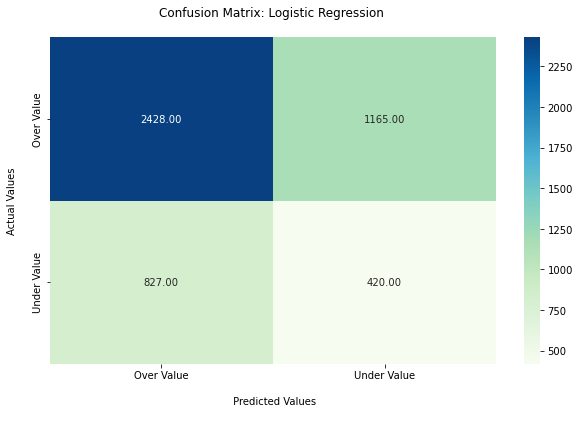

In [1124]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,logis_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix: Logistic Regression \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Over Value','Under Value'])
fx.yaxis.set_ticklabels(['Over Value','Under Value'])
plt.show()

In [1125]:
# Decision Tree

In [1126]:
dtrfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
dtrfe.fit(X_train_res,y_train_res)

print(X_train_res.columns[dtrfe.support_])

Index(['Acreage', 'Neighborhood', 'Finished Area', 'Foundation Type',
       'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year',
       'Property Value'],
      dtype='object')


In [1127]:
X_train_fs_dt = X_train_res[X_train_res.columns[dtrfe.support_]]
X_train_fs_dt.head()

,Acreage,Neighborhood,Finished Area,Foundation Type,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,Property Value
0,0.09,2326,2093.0,0,2015,3.0,2.0,1.0,2016,317800
1,0.21,3827,1150.0,1,1973,3.0,1.0,1.0,2015,103900
2,0.41,3130,912.0,0,1955,2.0,1.0,0.0,2016,106200
3,1.65,9530,3248.0,4,1972,3.0,3.0,0.0,2014,421400
4,0.24,7331,2184.0,1,1961,3.0,2.0,0.0,2015,171300


In [1128]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=7,random_state=369)
dt_model.fit(X_train_fs_dt, y_train_res)

DecisionTreeClassifier(max_depth=10, max_features=7, random_state=369)

In [1129]:
dt_model.feature_importances_

array([0.0282162 , 0.02654398, 0.03266227, 0.04066503, 0.05536046,
       0.0627024 , 0.12832484, 0.09830822, 0.46572373, 0.06149286])

In [1130]:
feature_labels = np.array(['Acreage', 'Neighborhood', 'Finished Area', 'Foundation Type',
       'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year',
       'Property Value'])
importance = dt_model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Sale Year-46.57%
Full Bath-12.83%
Half Bath-9.83%
Bedrooms-6.27%
Property Value-6.15%
Year Built-5.54%
Foundation Type-4.07%
Finished Area-3.27%
Acreage-2.82%
Neighborhood-2.65%


In [1131]:
# fn=['Acreage', 'Neighborhood', 'Finished Area', 'Foundation Type',
#        'Year Built', 'Exterior Wall', 'Bedrooms', 'Full Bath', 'Half Bath',
#        'Property Value']
# cn=['over valued', 'under valued']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# plot_tree(dt_model,
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);

In [1132]:
dt_pred = dt_model.predict(X_test[X_train_fs_dt.columns])

In [1133]:
print('Confusion Matrix:: Decision Tree')
print('\n')
print(confusion_matrix(y_test,dt_pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,dt_pred))

Confusion Matrix:: Decision Tree


[[2785  808]
 [ 643  604]]


Classification Report::


              precision    recall  f1-score   support

           0       0.81      0.78      0.79      3593
           1       0.43      0.48      0.45      1247

    accuracy                           0.70      4840
   macro avg       0.62      0.63      0.62      4840
weighted avg       0.71      0.70      0.71      4840



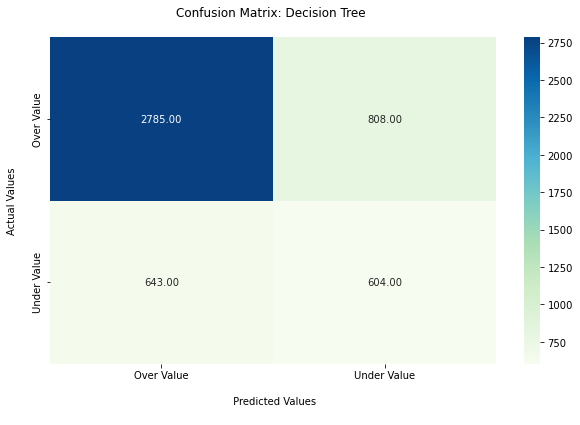

In [1134]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix: Decision Tree \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Over Value','Under Value'])
fx.yaxis.set_ticklabels(['Over Value','Under Value'])
plt.show()

In [1135]:
# Random Forest

In [1136]:
rndrfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rndrfe.fit(X_train_res,y_train_res)

print(X_train_res.columns[rndrfe.support_])

Index(['Acreage', 'Neighborhood', 'Finished Area', 'Foundation Type',
       'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year',
       'Property Value'],
      dtype='object')


In [1137]:
X_train_fs_rn = X_train_res[X_train_res.columns[rndrfe.support_]]
X_train_fs_rn.head()

,Acreage,Neighborhood,Finished Area,Foundation Type,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,Property Value
0,0.09,2326,2093.0,0,2015,3.0,2.0,1.0,2016,317800
1,0.21,3827,1150.0,1,1973,3.0,1.0,1.0,2015,103900
2,0.41,3130,912.0,0,1955,2.0,1.0,0.0,2016,106200
3,1.65,9530,3248.0,4,1972,3.0,3.0,0.0,2014,421400
4,0.24,7331,2184.0,1,1961,3.0,2.0,0.0,2015,171300


In [1138]:
rnd_model = RandomForestClassifier(n_estimators=100,max_depth=10,max_features=7,random_state=369)

In [1139]:
rnd_model.fit(X_train_fs_rn,y_train_res)

RandomForestClassifier(max_depth=10, max_features=7, random_state=369)

In [1141]:
feature_labels = np.array(['Acreage', 'Neighborhood', 'Finished Area', 'Foundation Type',
       'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year',
       'Property Value'])
importance = rnd_model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Sale Year-40.89%
Half Bath-11.95%
Full Bath-9.38%
Bedrooms-8.53%
Property Value-7.29%
Year Built-6.03%
Finished Area-4.66%
Neighborhood-4.24%
Acreage-3.65%
Foundation Type-3.37%


In [1142]:
rnd_pred = rnd_model.predict(X_test[X_train_fs_rn.columns])

In [1143]:
print('Confusion Matrix:: Random Forest')
print('\n')
print(confusion_matrix(y_test,rnd_pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,rnd_pred))

Confusion Matrix:: Random Forest


[[3032  561]
 [ 714  533]]


Classification Report::


              precision    recall  f1-score   support

           0       0.81      0.84      0.83      3593
           1       0.49      0.43      0.46      1247

    accuracy                           0.74      4840
   macro avg       0.65      0.64      0.64      4840
weighted avg       0.73      0.74      0.73      4840



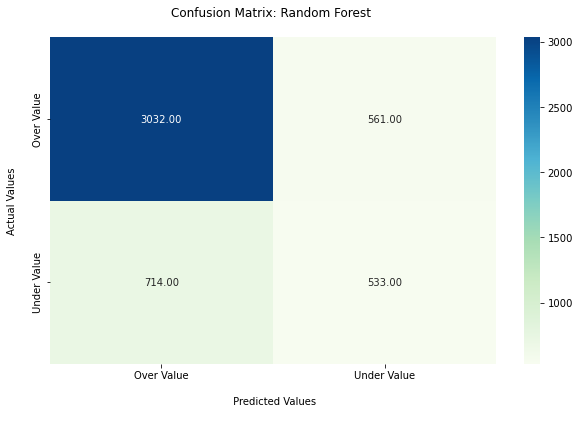

In [1008]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,rnd_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix: Random Forest \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Over Value','Under Value'])
fx.yaxis.set_ticklabels(['Over Value','Under Value'])
plt.show()

In [1009]:
# AdaBoosting

In [1144]:
adarfe = RFE(estimator=AdaBoostClassifier(), n_features_to_select=10)
adarfe.fit(X_train_res,y_train_res)

print(X_train_res.columns[adarfe.support_])

Index(['Tax District', 'Neighborhood', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year',
       'Property Value'],
      dtype='object')


In [1145]:
X_train_fs_ad = X_train_res[X_train_res.columns[adarfe.support_]]
X_train_fs_ad.head()

,Tax District,Neighborhood,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath,Sale Year,Property Value
0,6,2326,0,2015,3,3.0,2.0,1.0,2016,317800
1,6,3827,1,1973,0,3.0,1.0,1.0,2015,103900
2,6,3130,0,1955,3,2.0,1.0,0.0,2016,106200
3,4,9530,4,1972,1,3.0,3.0,0.0,2014,421400
4,6,7331,1,1961,0,3.0,2.0,0.0,2015,171300


In [1146]:
ada_boost_model = AdaBoostClassifier(n_estimators=100,random_state=369,
                         learning_rate=1)

In [1147]:
ada_boost_model.fit(X_train_fs_ad, y_train_res)


AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=369)

In [1150]:
feature_labels = np.array(['Tax District', 'Neighborhood', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year',
       'Property Value'])
importance = ada_boost_model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Bedrooms-35.00%
Full Bath-26.00%
Half Bath-15.00%
Neighborhood-6.00%
Sale Year-5.00%
Year Built-5.00%
Foundation Type-3.00%
Property Value-2.00%
Exterior Wall-2.00%
Tax District-1.00%


In [1151]:
adaboost_pred = ada_boost_model.predict(X_test[X_train_fs_ad.columns])

In [1152]:
print('Confusion Matrix:: AdaBoost')
print('\n')
print(confusion_matrix(y_test,adaboost_pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,adaboost_pred))

Confusion Matrix:: AdaBoost


[[2886  707]
 [ 660  587]]


Classification Report::


              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3593
           1       0.45      0.47      0.46      1247

    accuracy                           0.72      4840
   macro avg       0.63      0.64      0.64      4840
weighted avg       0.72      0.72      0.72      4840



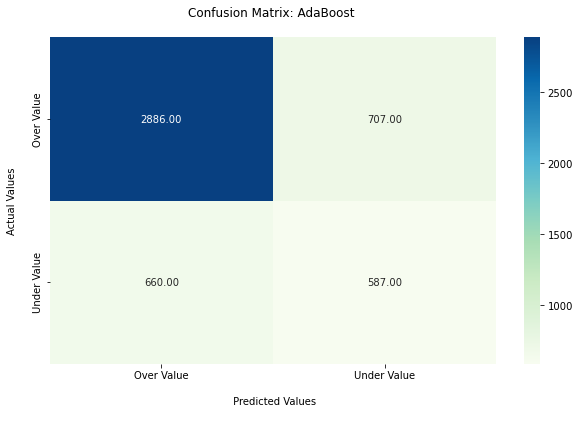

In [1153]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,adaboost_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix: AdaBoost \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Over Value','Under Value'])
fx.yaxis.set_ticklabels(['Over Value','Under Value'])
plt.show()